Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=a9837f8e30e5bfc65697b70b694160719a4b847f6925a7f3448ae182333d2a43
  Stored in directory: /root/.cache/pip/wheels/66/4e/88/6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 KB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.

--2023-02-01 02:51:53--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-02-01 02:51:53--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc672eb71bbf9f5a4627b4d10196.dl.dropboxusercontent.com/cd/0/inline/B1o8DrsQP72gmx9_7rPl2BlsyRpEkYu0bmcJoHdKCkaF0oMzG9k4yQiirNmQ2F45MV_LYnigLI7xt9F76xzhqbg4rn1DystxhwLX7W1815UDVmvZGxXpGUF2ledfossl22Wzo5cVha1lEmkZePHxXFA0UvmviVZ4pdaKXE4MZFZGNg/file# [following]
--2023-02-01 02:51:54--  https://uc672eb71bbf9f5a4627b4d10196.dl.dropboxusercontent.com/cd/0/inline/B1o8DrsQP72gmx9_7rPl2BlsyRpEkYu0bmcJoHdKCkaF0oMzG9k4yQiirNmQ2F45MV_LYnigLI7xt9F7

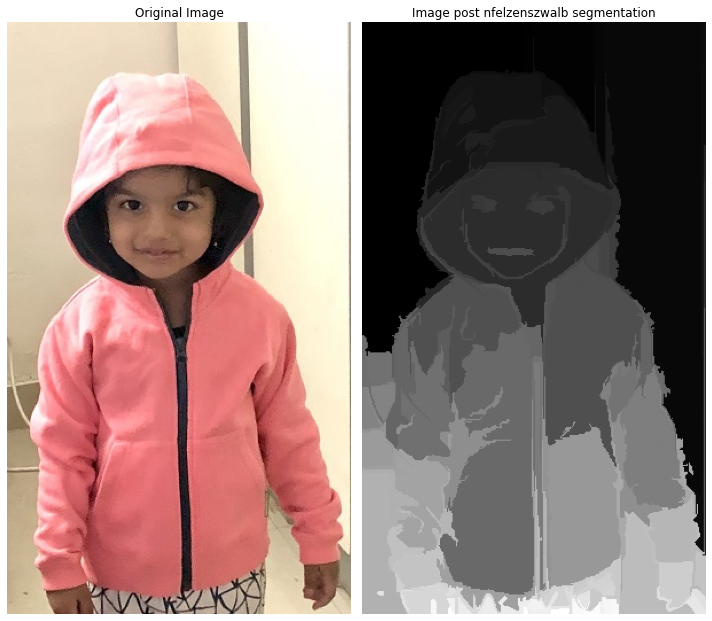

In [1]:
!pip install selectivesearch
!pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg', 1)

segments_fz = felzenszwalb(img, scale=200)

subplots([img, segments_fz], titles=['Original Image','Image post \
nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

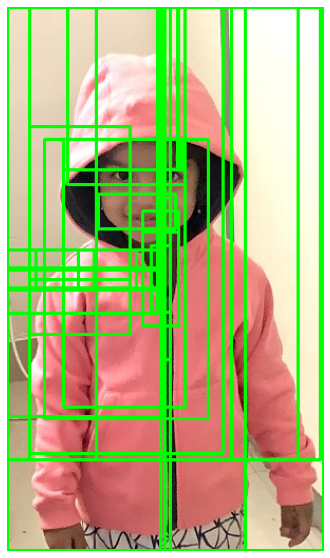

In [2]:
def extract_candidates(img):
  img_lbl, regions = selectivesearch.selective_search(img,
                                                      scale=200, min_size=100)
  img_area =  np.prod(img.shape[:2])
  candidates = []
  for r in regions:
    if r['rect'] in candidates: continue
    if r['size'] < (0.05*img_area): continue
    if r['size'] > (1*img_area): continue
    x, y, w, h = r['rect']
    candidates.append(list(r['rect']))
  return candidates
  
candidates = extract_candidates(img)
show(img, bbs = candidates)

In [3]:
print(candidates)

[
    [0, 0, 142, 290],
    [212, 0, 84, 429],
    [159, 210, 86, 177],
    [67, 268, 82, 230],
    [162, 302, 128, 193],
    [57, 0, 145, 154],
    [212, 0, 84, 429],
    [212, 0, 84, 429],
    [162, 302, 128, 213],
    [154, 226, 136, 289],
    [27, 268, 122, 230],
    [212, 0, 84, 429],
    [57, 0, 161, 154],
    [212, 0, 84, 429],
    [0, 268, 149, 230],
    [154, 226, 145, 289],
    [154, 181, 145, 334],
    [0, 268, 149, 247],
    [53, 125, 165, 154],
    [53, 125, 168, 154],
    [21, 113, 116, 258],
    [21, 113, 116, 310],
    [53, 125, 168, 379],
    [0, 249, 149, 266],
    [154, 181, 145, 334],
    [57, 0, 162, 154],
    [57, 0, 162, 154],
    [154, 181, 145, 334],
    [0, 249, 149, 266],
    [154, 181, 145, 334],
    [0, 0, 147, 388],
    [57, 0, 168, 168],
    [21, 0, 204, 423],
    [0, 0, 149, 515],
    [154, 181, 145, 334],
    [0, 0, 149, 515],
    [35, 125, 190, 390],
    [35, 125, 190, 390],
    [35, 125, 190, 390],
    [0, 0, 149, 515],
    [0, 0, 149, 515],
    [21, 0, 275, 429],
    [154, 181, 145, 334],
    [154, 0, 145, 515],
    [154, 0, 145, 515],
    [0, 0, 149, 515],
    [0, 0, 149, 515],
    [0, 0, 225, 515],
    [0, 0, 299, 515],
    [21, 0, 275, 429],
    [0, 0, 296, 429],
    [0, 0, 299, 515]
]

# 케글 데이터로 rcnn 구현

In [4]:
# ground truths 이미지와 이미지 정보가 담긴 csv 파일 다운

!pip install -q --upgrade selectivesearch torch_snippets
from torch_snippets import *
import selectivesearch
from google.colab import files
files.upload() # upload kaggle.json file which you can get
# by clicking on Create New API token in your personal account
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sixhky/open-images-bus-trucks/
!unzip -qq open-images-bus-trucks.zip
from torchvision import transforms, models, datasets
from torch_snippets import Report
from torchvision.ops import nms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Saving kaggle.json to kaggle.json
kaggle.json
 97% 357M/367M [00:03<00:00, 105MB/s]
100% 367M/367M [00:03<00:00, 110MB/s]


In [5]:
# 버스 트럭 데이터의 정보가 담긴 csv

IMAGE_ROOT = 'images/images'
DF_RAW = pd.read_csv('df.csv')

DF_RAW.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452


In [7]:
DF_RAW.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

In [8]:
def extract_candidates(img):
  img_lbl, regions = selectivesearch.selective_search(img,
                                                      scale=200, min_size=100)
  img_area =  np.prod(img.shape[:2])
  candidates = []
  for r in regions:
    if r['rect'] in candidates: continue
    if r['size'] < (0.05*img_area): continue
    if r['size'] > (1*img_area): continue
    x, y, w, h = r['rect']
    candidates.append(list(r['rect']))
    
  return candidates

def extract_iou(boxA, boxB, epsilon=1e-5):
  x1 = max(boxA[0], boxB[0])
  y1 = max(boxA[1], boxB[1])
  x2 = min(boxA[2], boxB[2])
  y2 = min(boxA[3], boxB[3])
  width = (x2 - x1)
  height = (y2 - y1)
  if (width<0) or (height <0):
    return 0.0

  area_overlap = width * height
  area_a = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
  area_b = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
  area_combined = area_a + area_b - area_overlap
  iou = area_overlap / (area_combined+epsilon)
  
  return iou

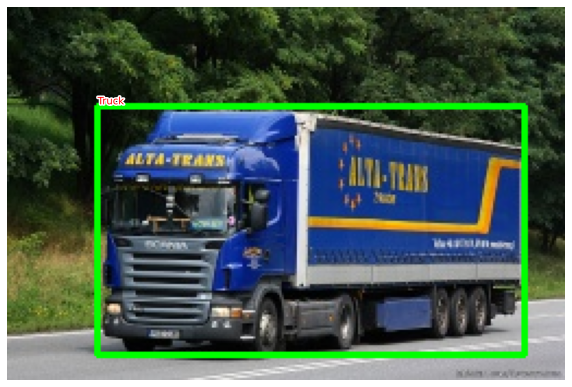

In [ ]:
class OpenImages(Dataset):
  def __init__(self, df, image_folder=IMAGE_ROOT):
    self.root = image_folder
    self.df = df
    self.unique_images = df['ImageID'].unique()

  def __len__(self): return len(self.unique_images)
  def __getitem__(self, ix):
    image_id = self.unique_images[ix]
    image_path = f'{self.root}/{image_id}.jpg'
    image = cv2.imread(image_path, 1)[...,::-1] # conver BGR to RGB
    h, w, _ = image.shape
    df = self.df.copy()
    df = df[df['ImageID'] == image_id]
    boxes = df['XMin,YMin,XMax,YMax'.split(',')].values

    boxes = (boxes * np.array([w,h,w,h])).astype(np.uint16).tolist()
    classes = df['LabelName'].values.tolist()
    return image, boxes, classes, image_path


ds = OpenImages(df=DF_RAW)
im, bbs, clss, _ = ds[9]

# torch 스니펫 메소드
show(im, bbs=bbs, texts=clss, sz=10)

-> 이게 gt에 사람이 일일히 라벨링을 해준 것으로 보인다.

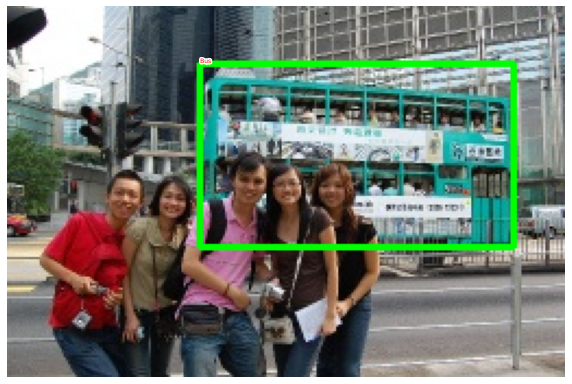

In [ ]:
im, bbs, clss, _ = ds[0]

# torch 스니펫 메소드
show(im, bbs=bbs, texts=clss, sz=10)

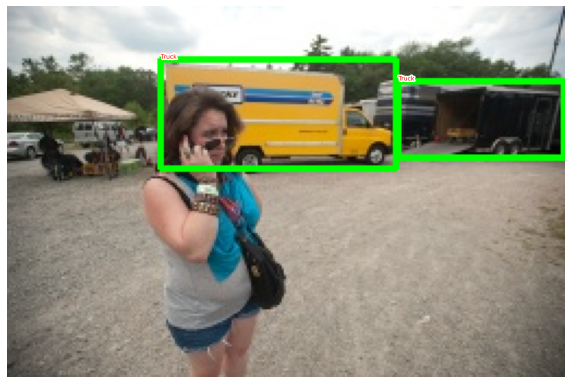

In [ ]:
im, bbs, clss, _ = ds[1]

# torch 스니펫 메소드
show(im, bbs=bbs, texts=clss, sz=10)

In [ ]:
FPATHS, GTBBS, CLSS, DELTAS, ROIS, IOUS = [], [], [], [], [], []
N = 500
for ix, (im, bbs, labels, fpath) in enumerate(ds):
  if(ix==N):
    break
  H, W, _ = im.shape
  candidates = extract_candidates(im)
  candidates = np.array([(x,y,x+w,y+h) for x,y,w,h in candidates])
  
print(candidates)
#   ious, rois, clss, deltas = [], [], [], []
#   ious = np.array([[extract_iou(candidate, _bb_) for candidate in candidates] for _bb_ in bbs]).T
#   for jx, candidate in enumerate(candidates):
#     cx,cy,cX,cY = candidate
#     candidate_ious = ious[jx]
#     best_iou_at = np.argmax(candidate_ious)
#     best_iou = candidate_ious[best_iou_at]
#     best_bb = _x,_y,_X,_Y = bbs[best_iou_at]
#     if best_iou > 0.3: clss.append(labels[best_iou_at])
#     else : clss.append('background')
#     delta = np.array([_x-cx, _y-cy, _X-cX, _Y-cY]) / np.array([W,H,W,H])
#     deltas.append(delta)
#     rois.append(candidate / np.array([W,H,W,H]))
#   FPATHS.append(fpath)
#   IOUS.append(ious)
#   ROIS.append(rois)
#   CLSS.append(clss)
#   DELTAS.append(deltas)
#   GTBBS.append(bbs)


# FPATHS = [f'{IMAGE_ROOT}/{stem(f)}.jpg' for f in FPATHS]
# FPATHS, GTBBS, CLSS, DELTAS, ROIS = [item for item in [FPATHS, GTBBS, CLSS, DELTAS, ROIS]]

[[  154    40 77540 20176]
 [   98    36 49428 18168]
 [  140     0 70535    41]
 [   61    32 30854 16160]
 [  121     0 60997    41]
 [  121     0 60997    41]
 [    0    72   123 36295]
 [  155    86 78042 43320]
 [    0    34    73 17173]
 [    0    34   167 17180]
 [  107    75 53879 37819]
 [   23    75 11711 37819]
 [  143    86 72018 43322]
 [    0    72   123 36295]
 [  143    86 72032 43322]
 [  143    86 72041 43341]
 [  121     0 60997    41]
 [  143    86 72041 43341]
 [  143    86 72041 43341]
 [    0    72   131 36313]
 [   61    32 30877 16177]
 [  121     0 60997    75]
 [    0    72   131 36313]
 [    0    72   131 36313]
 [    0    34   167 17201]
 [   61     0 30877   113]
 [   23    75 11711 37819]
 [   61     0 30877   113]
 [    0    34   167 17201]
 [    0    34   167 17201]
 [  143    86 72041 43341]
 [    0     0   167   133]
 [  143    82 72041 41333]
 [  143    82 72041 41333]
 [   61     0 30877   169]
 [    0     0    56    48]
 [    0     0   167   169]
 